Firma AAAAutoSprzedam jest platformą umożliwiającą publikowanie ogłoszeń sprzedaży 
samochodów. Oprócz bardzo taniego ogłoszenia typu Basic oferuje swoim klientom – 
ogłoszeniodawcom – również płatne promowane ogłoszenia typu Premium i Plus. Na liście 
ogłoszeń w pierwszej kolejności pojawiają się ofery Premium, następnie Plus a na końcu pozostałe 
ogłoszenia.  Klienci są informowani, że wykupienie płatego ogłoszenia zwiększy jego skuteczność.
W celu zwiększenia efektywności sprzedaży promowanych, dział komunikacji z klientem 
potrzebuje wiedzy o tym, jak poszczególne produkty wpływają na sukces ogłoszeniodawcy. 
Pomoże to doprecyzować przekaz o skuteczność płatnego ogłoszenia Premium lub Plus.
Zespół analityczny proszony jest o przygotowanie 15 minutowej prezentacji, odpowiadającej na 
pytania:<br>
• Jaki jest wpływ droższych produktów na skuteczność ogłoszenia?<br>
• Czy w danych są wzorce, które uznalibyście za ciekawe lub niespodziewane?<br>
• Jaki jest wpływ dostępnych zmiennych na skuteczność ogłoszenia?<br>
• Jakie dodatkowe dane mogłyby być wykorzystane w analizie?<br>

views per day

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

import xgboost as xgb

In [4]:
data = pd.read_csv('AAAutoSprzedam_data.csv', sep=';')

In [5]:
data.isnull().sum()

article_id                  0
product_tier                0
make_name                   0
price                       0
first_zip_digit             0
first_registration_year     0
created_date                0
deleted_date                0
search_views               10
detail_views               10
stock_days                  0
ctr                        24
dtype: int64

In [6]:
data.created_date = pd.to_datetime(data.created_date)
data.deleted_date = pd.to_datetime(data.deleted_date)

In [7]:
stock_days2 = data.deleted_date - data.created_date

In [8]:
data['stock_days2'] = stock_days2

In [9]:
data.stock_days2 = data.stock_days2/np.timedelta64(1, 'D')
data.stock_days2 = data.stock_days2 + 1

In [10]:
data.stock_days2.min()

1.0

In [11]:
data[data.stock_days2 == 0]

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,stock_days2


In [12]:
data.drop('stock_days',axis=1,inplace=True)

In [13]:
data['ctr2'] = data.detail_views/data.search_views

In [14]:
data.drop('ctr',axis=1, inplace=True)

In [15]:
data.article_id.value_counts().head(20)

359772384    2
360768628    2
360768627    2
364638423    2
350214315    2
360768625    2
360768632    2
360768624    2
354755824    2
350214314    2
354755822    2
360472733    2
357528924    2
360793587    2
358519054    2
354755829    2
359754168    1
349571668    1
360448597    1
350173618    1
Name: article_id, dtype: int64

In [16]:
data = data.sort_values(by='article_id')

In [17]:
data = data.drop_duplicates(subset='article_id', keep=False)

In [18]:
data.sort_values('article_id',ascending=True)

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days2,ctr2
38868,347232386,Basic,Nissan,6850,7,2005,2018-07-04,2018-07-13,297.0,22.0,10.0,0.074074
29915,347232409,Basic,Peugeot,850,5,2004,2018-07-04,2018-08-14,3920.0,276.0,42.0,0.070408
45555,347232416,Basic,Mercedes-Benz,16950,7,2013,2018-07-04,2018-09-15,1564.0,118.0,74.0,0.075448
77759,347232417,Basic,Skoda,2995,6,2010,2018-07-04,2018-07-16,2372.0,183.0,13.0,0.077150
72821,347232422,Basic,Toyota,4300,4,2008,2018-07-04,2018-10-01,3215.0,208.0,90.0,0.064697
3076,347232425,Basic,Opel,1850,4,2003,2018-07-04,2018-07-10,231.0,50.0,7.0,0.216450
48396,347246626,Basic,Toyota,6450,1,2009,2018-07-04,2018-07-19,236.0,30.0,16.0,0.127119
51363,347246657,Basic,Toyota,9450,3,2016,2018-07-04,2018-07-13,74.0,1.0,10.0,0.013514
71680,347246658,Basic,Toyota,9250,3,2016,2018-07-04,2018-07-25,204.0,1.0,22.0,0.004902
13874,347246660,Basic,BMW,24890,4,2014,2018-07-04,2018-10-01,7456.0,457.0,90.0,0.061293


In [19]:
data['dv_perD'] = data.detail_views/data.stock_days2

In [20]:
data['sv_perD'] = data.search_views/data.stock_days2

In [21]:
data.sort_values(['sv_perD','dv_perD'],ascending=False)

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days2,ctr2,dv_perD,sv_perD
64208,360493469,Basic,Volvo,100,1,2018,2018-10-12,2018-10-20,96582.0,1559.0,9.0,0.016142,173.222222,10731.333333
5179,363933708,Premium,Audi,4500,2,2015,2018-11-20,2018-12-10,171829.0,6155.0,21.0,0.035820,293.095238,8182.333333
44791,363933706,Premium,Audi,4500,2,2015,2018-11-20,2018-12-10,171168.0,4682.0,21.0,0.027353,222.952381,8150.857143
38966,363933707,Premium,Audi,4500,2,2014,2018-11-20,2018-12-10,158698.0,13926.0,21.0,0.087752,663.142857,7557.047619
74838,359753805,Basic,Renault,199,7,2015,2018-10-04,2019-01-21,608754.0,12286.0,110.0,0.020182,111.690909,5534.127273
49762,357876594,Basic,Citroen,99,7,2017,2018-09-12,2018-09-19,37238.0,372.0,8.0,0.009990,46.500000,4654.750000
72007,348760265,Premium,Peugeot,649,3,2002,2018-07-12,2018-09-09,262007.0,3473.0,60.0,0.013255,57.883333,4366.783333
13945,358532508,Premium,Ford,575,3,2004,2018-09-20,2018-10-03,57236.0,501.0,14.0,0.008753,35.785714,4088.285714
10721,347277802,Premium,Fiat,499,5,2003,2018-07-04,2018-07-11,32565.0,357.0,8.0,0.010963,44.625000,4070.625000
51285,354421135,Premium,Audi,1245,6,1997,2018-08-16,2018-09-01,68252.0,1483.0,17.0,0.021728,87.235294,4014.823529


In [22]:
data.first_registration_year.replace(2106,2006,True)

In [23]:
data.first_registration_year.replace(2020,2002,True)

In [24]:
data['old'] = 2019 - data.first_registration_year

In [25]:
data.sort_values('first_registration_year',0,False)

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days2,ctr2,dv_perD,sv_perD,old
7047,363572119,Basic,Land Rover,178888,5,2019,2018-11-16,2018-11-20,970.0,38.0,5.0,0.039175,7.600000,194.000000,0
78161,355477561,Basic,Skoda,34950,7,2019,2018-08-24,2018-09-01,84.0,0.0,9.0,0.000000,0.000000,9.333333,0
41755,355477564,Basic,Skoda,21995,7,2019,2018-08-24,2018-09-01,85.0,0.0,9.0,0.000000,0.000000,9.444444,0
46681,355477563,Basic,Skoda,20695,7,2019,2018-08-24,2018-09-01,88.0,4.0,9.0,0.045455,0.444444,9.777778,0
22265,360811305,Basic,Volkswagen,35745,1,2019,2018-10-16,2019-01-17,708.0,19.0,94.0,0.026836,0.202128,7.531915,0
33306,359233680,Basic,Nissan,26945,3,2019,2018-09-28,2019-01-14,735.0,25.0,109.0,0.034014,0.229358,6.743119,0
57720,355477562,Basic,Skoda,21650,7,2019,2018-08-24,2018-09-01,77.0,1.0,9.0,0.012987,0.111111,8.555556,0
35693,363592564,Basic,Volvo,55130,2,2019,2018-11-16,2019-02-28,1942.0,27.0,105.0,0.013903,0.257143,18.495238,0
36997,360811304,Basic,Volkswagen,37250,1,2019,2018-10-16,2019-01-17,825.0,23.0,94.0,0.027879,0.244681,8.776596,0
41917,363615551,Basic,Volkswagen,28345,4,2019,2018-11-16,2019-02-04,2507.0,84.0,81.0,0.033506,1.037037,30.950617,0


In [26]:
data = data.drop('article_id', axis = 1)

In [27]:
data.groupby(by='product_tier').mean().T

product_tier,Basic,Plus,Premium
price,15100.425396,12828.761821,14648.924341
first_zip_digit,4.644016,4.716287,4.191526
first_registration_year,2011.122658,2009.577933,2010.368785
search_views,1909.310405,6754.464098,13419.518374
detail_views,82.542171,249.821366,399.963251
stock_days2,37.034361,39.831874,34.284911
ctr2,0.047283,0.040950,0.035783
dv_perD,2.790178,7.527167,13.323658
sv_perD,58.362783,197.687253,436.896388
old,7.877342,9.422067,8.631215


In [28]:
data = data.dropna()

In [29]:
data.sample(3)

,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days2,ctr2,dv_perD,sv_perD,old
71357,Basic,Fiat,3449,3,2010,2018-07-24,2018-08-18,12427.0,459.0,26.0,0.036936,17.653846,477.961538,9
71862,Basic,Volvo,69995,2,2018,2018-10-04,2018-11-08,4002.0,50.0,36.0,0.012494,1.388889,111.166667,1
60360,Basic,Audi,18750,7,2012,2018-07-12,2018-07-21,105.0,32.0,10.0,0.304762,3.200000,10.500000,7


#### XGBoost 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
le = LabelEncoder()

In [32]:
for i in ['product_tier', 'make_name']:
    data[ i + '_le'] = le.fit_transform(data[ i ])

In [33]:
data.sample(4)

,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days2,ctr2,dv_perD,sv_perD,old,product_tier_le,make_name_le
70656,Basic,Ford,1950,6,2004,2018-09-20,2018-10-10,476.0,8.0,21.0,0.016807,0.380952,22.666667,15,0,33
55623,Premium,Audi,28950,4,2014,2018-09-28,2018-10-06,1491.0,29.0,9.0,0.019450,3.222222,165.666667,5,2,8
23541,Basic,Skoda,5995,9,2012,2018-07-16,2018-10-10,1075.0,20.0,87.0,0.018605,0.229885,12.356322,7,0,78
60672,Basic,Opel,9345,7,2016,2018-10-24,2018-11-02,190.0,2.0,10.0,0.010526,0.200000,19.000000,3,0,67


### tu wprowadzam data_xgb

In [34]:
data_xgb = data[['price', 'first_zip_digit', 'first_registration_year', 'product_tier_le', 'make_name_le' , 'detail_views']]
data_xgb.sample(3)

,price,first_zip_digit,first_registration_year,product_tier_le,make_name_le,detail_views
75377,3995,2,2011,0,76,95.0
2758,14950,5,1968,0,88,727.0
78151,11980,4,2008,0,10,53.0


In [35]:
data_xgb.describe().T

,count,mean,std,min,25%,50%,75%,max
price,78265.0,15072.534466,16377.790518,50.0,5750.0,10920.0,18895.0,249888.0
first_zip_digit,78265.0,4.630933,2.354285,1.0,3.0,5.0,7.0,9.0
first_registration_year,78265.0,2011.089989,6.530368,1924.0,2008.0,2013.0,2015.0,2019.0
product_tier_le,78265.0,0.066403,0.347997,0.0,0.0,0.0,0.0,2.0
make_name_le,78265.0,57.723350,26.388947,0.0,33.0,67.0,78.0,90.0
detail_views,78265.0,93.158244,226.197414,0.0,13.0,36.0,94.0,13926.0


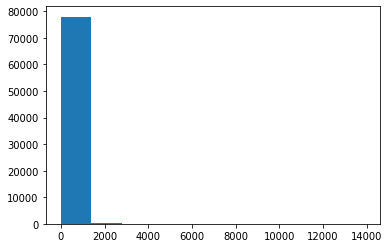

In [36]:
import matplotlib.pyplot as plt
plt.hist(data_xgb.detail_views);   # noł good --> outlyers !!

### xgb regressor

In [37]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt

np.random.seed(0)

import xgboost as xgb
#from sklearn.model_selection import cross_val_score

#from ml_metrics import rmsle
from scikitplot.estimators import plot_learning_curve 
from scikitplot.estimators import plot_feature_importances 

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error



In [38]:
X = data_xgb.iloc[:,0:-1]
y = data_xgb['detail_views']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (54785, 5) (54785,)
Test: (23480, 5) (23480,)


In [40]:
model = xgb.XGBRegressor(max_depth=8, x_subsample= 0.6, n_estimators=300, random_state=0)

model.fit(X_train, y_train) 

y_pred = model.predict(X_test)


[11:54:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pc\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [41]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


rmse


242.27409493779024

####  wyrzucanie outlyerów w detail_viwes

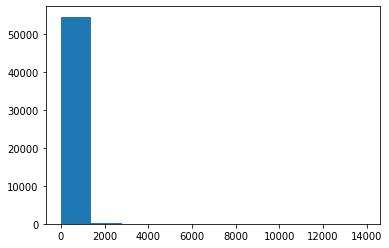

In [42]:
plt.hist(y_train);

In [43]:
min(y), max(y)

(0.0, 13926.0)

In [44]:
pd.set_option('display.max_rows', None)

data_xgb.groupby(data_xgb['detail_views']).size()

detail_views
0.0        1244
1.0        1750
2.0        1837
3.0        1583
4.0        1755
5.0        1580
6.0        1557
7.0        1448
8.0        1350
9.0        1335
10.0       1310
11.0       1153
12.0       1168
13.0       1149
14.0       1148
15.0       1099
16.0       1073
17.0        981
18.0       1012
19.0        973
20.0        937
21.0        898
22.0        864
23.0        855
24.0        770
25.0        824
26.0        753
27.0        765
28.0        691
29.0        735
30.0        750
31.0        664
32.0        713
33.0        627
34.0        626
35.0        648
36.0        574
37.0        568
38.0        581
39.0        564
40.0        537
41.0        511
42.0        508
43.0        520
44.0        490
45.0        485
46.0        464
47.0        447
48.0        419
49.0        418
50.0        415
51.0        431
52.0        415
53.0        388
54.0        384
55.0        386
56.0        375
57.0        378
58.0        367
59.0        358
60.0        353
61.0       

In [45]:
data_xgb.groupby(data_xgb['detail_views']>2000).size()

detail_views
False    78127
True       138
dtype: int64

In [46]:
data_xgb = data_xgb[data_xgb['detail_views']<2000]

In [47]:
data_xgb.groupby(data_xgb['detail_views']).size()

detail_views
0.0       1244
1.0       1750
2.0       1837
3.0       1583
4.0       1755
5.0       1580
6.0       1557
7.0       1448
8.0       1350
9.0       1335
10.0      1310
11.0      1153
12.0      1168
13.0      1149
14.0      1148
15.0      1099
16.0      1073
17.0       981
18.0      1012
19.0       973
20.0       937
21.0       898
22.0       864
23.0       855
24.0       770
25.0       824
26.0       753
27.0       765
28.0       691
29.0       735
30.0       750
31.0       664
32.0       713
33.0       627
34.0       626
35.0       648
36.0       574
37.0       568
38.0       581
39.0       564
40.0       537
41.0       511
42.0       508
43.0       520
44.0       490
45.0       485
46.0       464
47.0       447
48.0       419
49.0       418
50.0       415
51.0       431
52.0       415
53.0       388
54.0       384
55.0       386
56.0       375
57.0       378
58.0       367
59.0       358
60.0       353
61.0       335
62.0       327
63.0       338
64.0       313
65.0       3

In [48]:
X = data_xgb.iloc[:,0:-1]
y = data_xgb['detail_views']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (54688, 5) (54688,)
Test: (23438, 5) (23438,)


In [ ]:
model = xgb.XGBRegressor(max_depth=8, x_subsample= 0.7, n_estimators=300, random_state=0)

model.fit(X_train, y_train) 

y_pred = model.predict(X_test)


In [53]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


rmse


146.32054579983333

In [56]:
#inne parametry

params = {'max_depth':6, 
         'objective':'reg:squarederror', 
         'n_etimators': 3,
         'booster':'gbtree',
         'learning_rate': 7,
         'reg_lambda':0.93}



model = xgb.XGBRegressor(params=params, random_state=0)

model.fit(X_train, y_train) 

y_pred = model.predict(X_test)


C:\Users\Pc\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


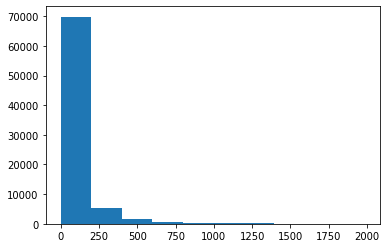

In [122]:
plt.hist(y);

In [57]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


rmse


144.44171869327533

#### sprawdzam jeszcze, czy nie zepsółam statystyk detail views dla product tier - wywalając największe detali_views

In [54]:
data_xgb.sample(3)

,price,first_zip_digit,first_registration_year,product_tier_le,make_name_le,detail_views
7004,19950,6,2011,0,10,129.0
58806,45950,2,2014,0,43,174.0
49346,23950,1,2014,0,10,158.0


In [55]:
data_xgb.groupby(by='product_tier_le').mean() 


,price,first_zip_digit,first_registration_year,make_name_le,detail_views
product_tier_le,,,,,
0,15103.588455,4.643365,2011.131842,57.837834,78.306680
1,12810.673111,4.725835,2009.594025,57.818981,242.416520
2,14621.409251,4.193392,2010.439207,54.222907,344.003524
